In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('dataset_full.csv')

# Display the first few rows of the dataset
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [5]:
# Check the shape of the dataset
print('Shape of the dataset:', df.shape)

# Check the data types of the columns
print('\nData types of the columns:')
print(df.dtypes)

# Check for missing values
print('\nMissing values in the dataset:')
print(df.isnull().sum())

Shape of the dataset: (88647, 112)

Data types of the columns:
qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

Missing values in the dataset:
qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64


In [6]:
# Check for duplicate values
print('Number of duplicate rows:', df.duplicated().sum())

# Drop duplicate values
df = df.drop_duplicates()
print('Number of duplicate rows after removal:', df.duplicated().sum())

Number of duplicate rows: 1438
Number of duplicate rows after removal: 0


In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target
X = df.drop('phishing', axis=1)
y = df['phishing']

# Split the features and target into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and test sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (69767, 111)
y_train shape: (69767,)
X_test shape: (17442, 111)
y_test shape: (17442,)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the Random Forest classifier with balanced class weights
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11364
           1       0.95      0.96      0.96      6078

    accuracy                           0.97     17442
   macro avg       0.97      0.97      0.97     17442
weighted avg       0.97      0.97      0.97     17442



In [6]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define the RandomizedSearchCV method
clf_cv = RandomizedSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV method
clf_cv.fit(X_train, y_train)

# Print the best parameters
print('Best parameters:', clf_cv.best_params_)

# Make predictions on the test set using the best model
y_pred_cv = clf_cv.predict(X_test)

# Print the classification report of the best model
print(classification_report(y_test, y_pred_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  11.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  12.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  12.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  24.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  24.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  24.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  25.8s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  

In [7]:
import joblib

# Save the best model to a file
joblib.dump(clf_cv.best_estimator_, 'phishing_url_classifier.pkl')

['phishing_url_classifier.pkl']

<Axes: >

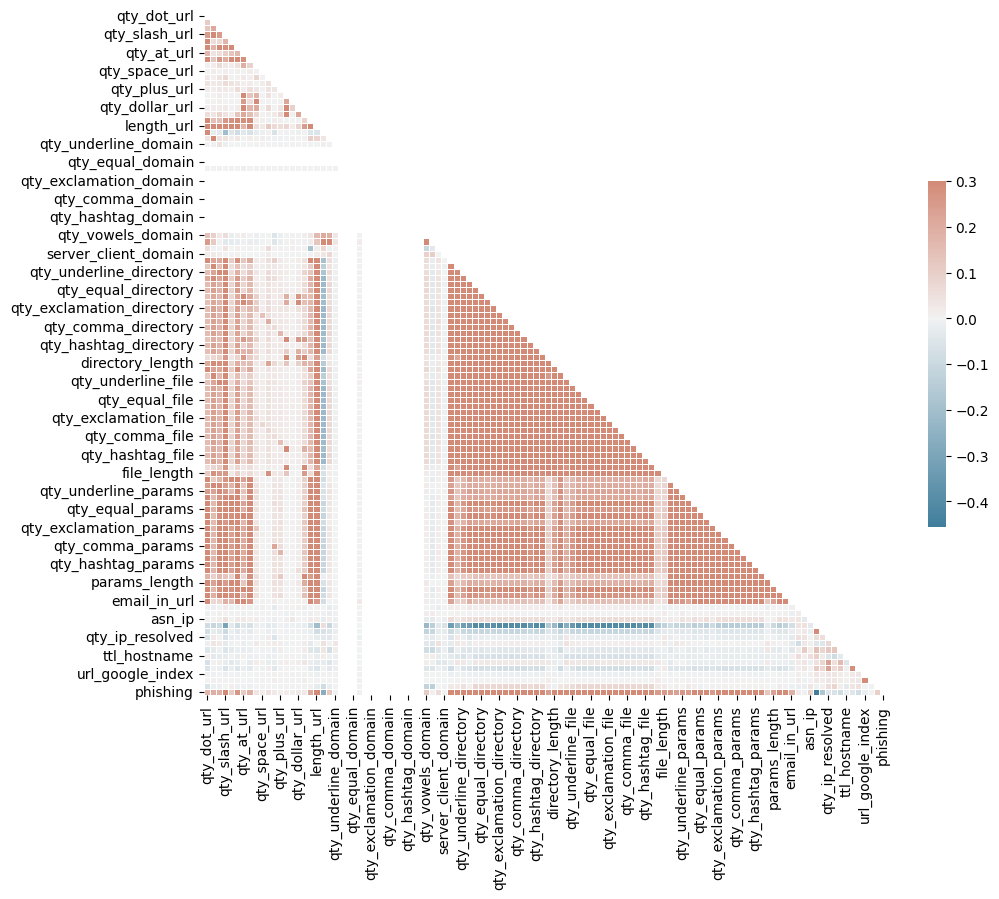

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
rfecv = RFECV(estimator=RandomForestClassifier(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

print('Optimal number of features: {}'.format(rfecv.n_features_))
print('Best features:', X_train.columns[rfecv.support_])

KeyboardInterrupt: 

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
numeric_features = ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_equal_url', 'qty_percent_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_vowels_domain',
       'domain_length', 'qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory',
       'qty_exclamation_directory', 'qty_tilde_directory',
       'qty_comma_directory', 'qty_asterisk_directory',
       'qty_hashtag_directory', 'qty_percent_directory', 'directory_length',
       'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_questionmark_file', 'qty_at_file', 'qty_exclamation_file',
       'qty_comma_file', 'qty_plus_file', 'qty_asterisk_file',
       'qty_percent_file', 'file_length', 'qty_dot_params',
       'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params',
       'qty_equal_params', 'qty_and_params', 'qty_space_params',
       'qty_tilde_params', 'qty_comma_params', 'qty_plus_params',
       'qty_hashtag_params', 'qty_dollar_params', 'qty_percent_params',
       'params_length', 'tld_present_params', 'qty_params', 'time_response',
       'domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_shortened']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])


In [19]:

# Define the models with pipeline
models = [
    ('LR', Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=10000))])),
    ('KNN', Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])),
    ('SVC', Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC())])),
    ('RF', Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])),
    ('GNB', Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GaussianNB())])),
    ('DTC', Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())]))
]

# Define the hyperparameters
hyperparameters = {
    'LR': {'classifier__C': [0.1, 1, 10]},
    'KNN': {'classifier__n_neighbors': [3, 5, 7]},
    'SVC': {'classifier__C': [0.1, 1, 10], 'classifier__gamma': ['scale', 'auto']},
    'RF': {'classifier__n_estimators': [10, 100, 1000], 'classifier__max_depth': [None, 5, 10]},
    'GNB': {},
    'DTC': {'classifier__max_depth': [3, 5, 7]}
}

# Perform hyperparameter tuning
for name, pipeline in models:
    model = GridSearchCV(pipeline, hyperparameters[name], cv=5, n_jobs=-1)
    model.fit(X_train, y_train)
    print(name, 'Best Score: ', model.best_score_)
    print(name, 'Best Params: ', model.best_params_)


LR Best Score:  0.9325326272712603
LR Best Params:  {'classifier__C': 10}
KNN Best Score:  0.9522983981903416
KNN Best Params:  {'classifier__n_neighbors': 5}
SVC Best Score:  0.9578454464768242
SVC Best Params:  {'classifier__C': 10, 'classifier__gamma': 'scale'}


/home/mool/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RF Best Score:  0.9698998196005609
RF Best Params:  {'classifier__max_depth': None, 'classifier__n_estimators': 1000}
GNB Best Score:  0.9087248319803658
GNB Best Params:  {}
DTC Best Score:  0.9490159951690231
DTC Best Params:  {'classifier__max_depth': 7}


              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11364
           1       0.95      0.96      0.96      6078

    accuracy                           0.97     17442
   macro avg       0.97      0.97      0.97     17442
weighted avg       0.97      0.97      0.97     17442



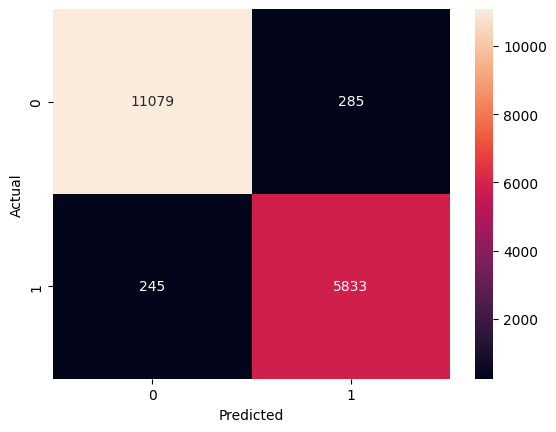

In [9]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming that 'X' is your feature set and 'y' is your target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with the best parameters
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()




Feature: 0, Score: 0.05524
Feature: 1, Score: 0.05198
Feature: 2, Score: 0.03736
Feature: 3, Score: 0.37563
Feature: 4, Score: 0.00981
Feature: 5, Score: 0.06215
Feature: 6, Score: 0.02230
Feature: 7, Score: 0.03193
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00052
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00047
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00030
Feature: 16, Score: 0.00643
Feature: 17, Score: 0.03839
Feature: 18, Score: 0.28004
Feature: 19, Score: 0.07325
Feature: 20, Score: 0.00805
Feature: 21, Score: 0.00185
Feature: 22, Score: 0.00327
Feature: 23, Score: 0.00073
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00175
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00088
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00017
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

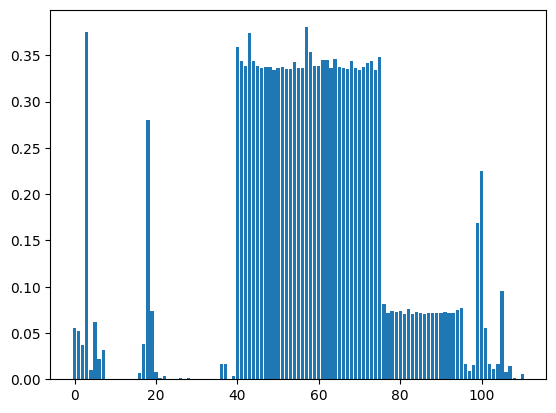

In [10]:
from sklearn.feature_selection import mutual_info_classif

# Calculate Mutual Information
importance = mutual_info_classif(X, y)

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


### BASED ON PERFORMANCE I AM ASSUMING TOP FEATURE 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11364
           1       0.94      0.95      0.94      6078

    accuracy                           0.96     17442
   macro avg       0.95      0.96      0.96     17442
weighted avg       0.96      0.96      0.96     17442



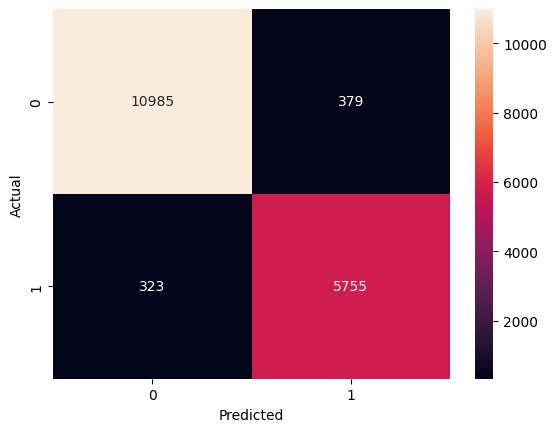

In [15]:
# Select top 40 features
top_n = 40
top_features = np.argsort(importance)[-top_n:]

# Select these top features from X
X_selected = X.iloc[:, top_features]

# Split the data into train and test sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with the best parameters
rf_clf_selected = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=42)

# Fit the model on the training data
rf_clf_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = rf_clf_selected.predict(X_test_selected)

# Print the classification report
print(classification_report(y_test, y_pred_selected))

# Print the confusion matrix
conf_mat_selected = confusion_matrix(y_test, y_pred_selected)
sns.heatmap(conf_mat_selected, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
from joblib import dump

# Save the model to a file
dump(rf_clf_selected, 'model.joblib')


['model.joblib']